***
# Starting Kit - Black Swan HiggsML Course
***

In [1]:
COLAB = 'google.colab' in str(get_ipython())


In [2]:

if COLAB:
    ! git clone --depth 1 https://github.com/blackSwanCS/Collaboration_A
    ! git status
    %cd Collaboration_A


In [ ]:


# HiggsML utility package should not be modified
%pip install HiggsML 
    

Processing d:\work_stuff\blackswan\black_swan_pkg
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Created wheel for HiggsML: filename=higgsml-0.0.0-py3-none-any.whl size=26780 sha256=a0c5e4c68d284317aaa1f00c9ad51934de12b1cd8bc0b38b918713623d37a41c
  Stored in directory: C:\Users\Ragansu_User\AppData\Local\Temp\pip-ephem-wheel-cache-avq7b6ze\wheels\94\56\d9\e94b438832442af5ade4c9dbfeeb72f97c1dc846a827c825c0
Successfully built HiggsML
  Attempting uninstall: HiggsML
    Found existing installation: HiggsML 0.0.0
    Uninstalling HiggsML-0.0.0:
      Successfully uninstalled HiggsML-0.0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Imports

In [4]:
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys
warnings.filterwarnings("ignore")

### Directories

In [5]:

root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    

Root directory is d:\Work_Stuff\BlackSwan\Collaboration_A


## Import Submission Model
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: receives train set and systematics class as input
- `fit`: can be used for training
- `predict`: receives one test set and outputs a dictionary with the following keys
    - `mu_hat` : predicted mu $\hat{\mu}$
    - `delta_mu_hat`: $\Delta{\hat{\mu}}$ bound for $\mu$
    - `p16`: 16th percentile
    - `p84`: 84th percentile

In this example code, the `Model` class implements a basic model with 2 different model trained to predict the class label. 

* 1 XGBoost BDT ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/boosted_decision_tree.py) )
* 2 Tebsorflow NN  ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/neural_network.py) )

The feature engineering is in where you can include derived quantities and decide which feature should be needed. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/feature_engineering.py) ) 

the statistical analysis part is where yoiu write the mu finding calculation using the output of the classifier. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/statistical_analysis.py) ) 

If running in Collab, click the folder icon in the left sidebar to open the file browser.


In [6]:
path.append(submission_dir)
from model import Model

## Data
### Available data sets
1. blackSwan_data
2. sample_data
3. neurips2024_data 

In [7]:
from HiggsML.datasets import download_dataset
data = download_dataset("blackSwan_data") # change to "blackSwan_data" for the actual data



2025-05-23 12:01:10,607 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-05-23 12:01:10,608 - HiggsML.datasets     - INFO     - Current working directory: d:\Work_Stuff\BlackSwan\Collaboration_A
2025-05-23 12:01:10,610 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-05-23 12:01:10,611 - HiggsML.datasets     - INFO     - Test size: 600000


### ⚠️ Note:
The data used here is a small subset of the full data is for demonstration only to get a view of what the data looks like. 

In [8]:
# load train set
data.load_train_set()
data_set = data.get_train_set()


2025-05-23 12:01:10,684 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-05-23 12:01:11,532 - HiggsML.datasets     - INFO     - Data loaded successfully


***
## Visualize the Data Set
***

In [9]:
from tabulate import tabulate

target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)


weight_keys = {}
average_weights = {}
for key in keys:
    weight_keys[key] = weights[detailed_label == key]
    
table_data = []
for key in keys:
    table_data.append([key, np.sum(weight_keys[key]), len(weight_keys[key]),np.mean(weight_keys[key])])

table_data.append(["Total Signal", np.sum(weights[target == 1]), len(weights[target == 1]),np.mean(weights[target == 1])])
table_data.append(["Total Background", np.sum(weights[target == 0]), len(weights[target == 0]),np.mean(weights[target == 0])])


print("[*] --- Detailed Label Summary")
print(tabulate(table_data, headers=["Detailed Label", "Total Weight", "Number of events", "Average Weight"], tablefmt='grid'))


[*] --- Detailed Label Summary
+------------------+----------------+--------------------+------------------+
| Detailed Label   |   Total Weight |   Number of events |   Average Weight |
+==================+================+====================+==================+
| diboson          |        382.103 |               3406 |      0.112185    |
+------------------+----------------+--------------------+------------------+
| htautau          |        101.383 |             462981 |      0.000218979 |
+------------------+----------------+--------------------+------------------+
| ttbar            |       4404.65  |              39293 |      0.112098    |
+------------------+----------------+--------------------+------------------+
| ztautau          |     100255     |             894320 |      0.112102    |
+------------------+----------------+--------------------+------------------+
| Total Signal     |        101.383 |             462981 |      0.000218979 |
+------------------+-------------

In [10]:
print("\n[*] --- Examples of all features\n")
display(data_set.head())


[*] --- Examples of all features



,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,...,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_had_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_met_phi_centrality,DER_lep_eta_centrality
0,37.472000,0.676,-1.520,46.752998,0.623,1.500,-25.000000,-25.000,-25.000,-25.000,...,30.256184,-25.000,-25.000000,-25.000000,3.020465,30.256184,84.224998,0.801489,1.365776,-25.000000
1,26.006001,-0.087,-1.412,60.009998,-0.290,-0.099,134.770996,0.350,2.894,49.673,...,124.359779,2.009,232.705902,-0.580650,1.328600,9.316307,270.459991,0.433361,1.413247,0.726747
2,20.622999,-0.922,-0.436,41.917999,-1.356,2.524,-25.000000,-25.000,-25.000,-25.000,...,10.601603,-25.000,-25.000000,-25.000000,2.991648,10.601603,62.541000,0.491984,1.315526,-25.000000
3,48.394001,0.202,0.816,27.916000,-0.552,-2.387,-25.000000,-25.000,-25.000,-25.000,...,10.455322,-25.000,-25.000000,-25.000000,3.171129,10.455322,76.309998,1.733558,-1.409702,-25.000000
4,39.840000,-0.005,1.487,30.997000,1.747,2.681,73.082001,3.369,-1.286,31.274,...,92.074677,3.370,254.889191,-0.003369,2.120175,6.207835,175.192993,1.285286,1.037429,0.366135


In [11]:
print("\n[*] --- Description of all features\n")
display(data_set.describe())


[*] --- Description of all features



,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,...,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_had_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_met_phi_centrality,DER_lep_eta_centrality
count,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,...,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06
mean,3.396482e+01,-1.664071e-03,3.532688e-04,4.310186e+01,-1.059442e-03,-7.431224e-04,2.039557e+01,-1.315356e+01,-1.315217e+01,-8.396195e+00,...,4.182135e+01,-1.887505e+01,5.100177e+01,-1.941999e+01,2.738726e+00,1.806350e+01,1.273698e+02,8.796806e-01,2.691063e-01,-1.930729e+01
std,1.806436e+01,1.223419e+00,1.813047e+00,2.134356e+01,1.246117e+00,1.813856e+00,6.307355e+01,1.255423e+01,1.254495e+01,3.432262e+01,...,5.431841e+01,1.143358e+01,2.382271e+02,1.057919e+01,6.103445e-01,1.601432e+01,1.094018e+02,5.094582e-01,1.217131e+00,1.060158e+01
min,2.000000e+01,-2.500000e+00,-3.142000e+00,2.287700e+01,-2.690000e+00,-3.142000e+00,-2.500000e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,...,1.173875e-02,-2.500000e+01,-2.500000e+01,-2.500000e+01,5.641427e-01,1.173875e-02,4.304400e+01,3.400616e-02,-1.414214e+00,-2.500000e+01
25%,2.395100e+01,-9.520000e-01,-1.568000e+00,3.077000e+01,-9.770000e-01,-1.572000e+00,-2.500000e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,...,1.094507e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,2.509546e+00,8.491425e+00,6.449300e+01,5.891082e-01,-1.332358e+00,-2.500000e+01
50%,2.901600e+01,-1.000000e-03,1.000000e-03,3.816800e+01,-1.000000e-03,3.000000e-03,-2.500000e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,...,2.156595e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,2.957897e+00,1.439308e+01,8.531300e+01,7.759828e-01,9.866624e-01,-2.500000e+01
75%,3.716600e+01,9.500000e-01,1.572000e+00,4.813200e+01,9.730000e-01,1.570000e+00,4.706200e+01,-1.560000e-01,-1.780000e-01,-2.500000e+01,...,4.885020e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,3.127119e+00,2.271586e+01,1.433570e+02,1.024202e+00,1.385667e+00,-2.500000e+01
max,1.101770e+03,2.500000e+00,3.142000e+00,8.452980e+02,2.680000e+00,3.142000e+00,1.203860e+03,4.991000e+00,3.142000e+00,1.001000e+03,...,1.175087e+03,9.666000e+00,6.555388e+03,2.229731e+01,5.804204e+00,7.199706e+02,2.497039e+03,2.160489e+01,1.414214e+00,1.000000e+00


[*] --- PRI_lep_phi histogram
[*] --- PRI_met histogram
[*] --- DER_lep_eta_centrality histogram
[*] --- DER_deltaeta_jet_jet histogram


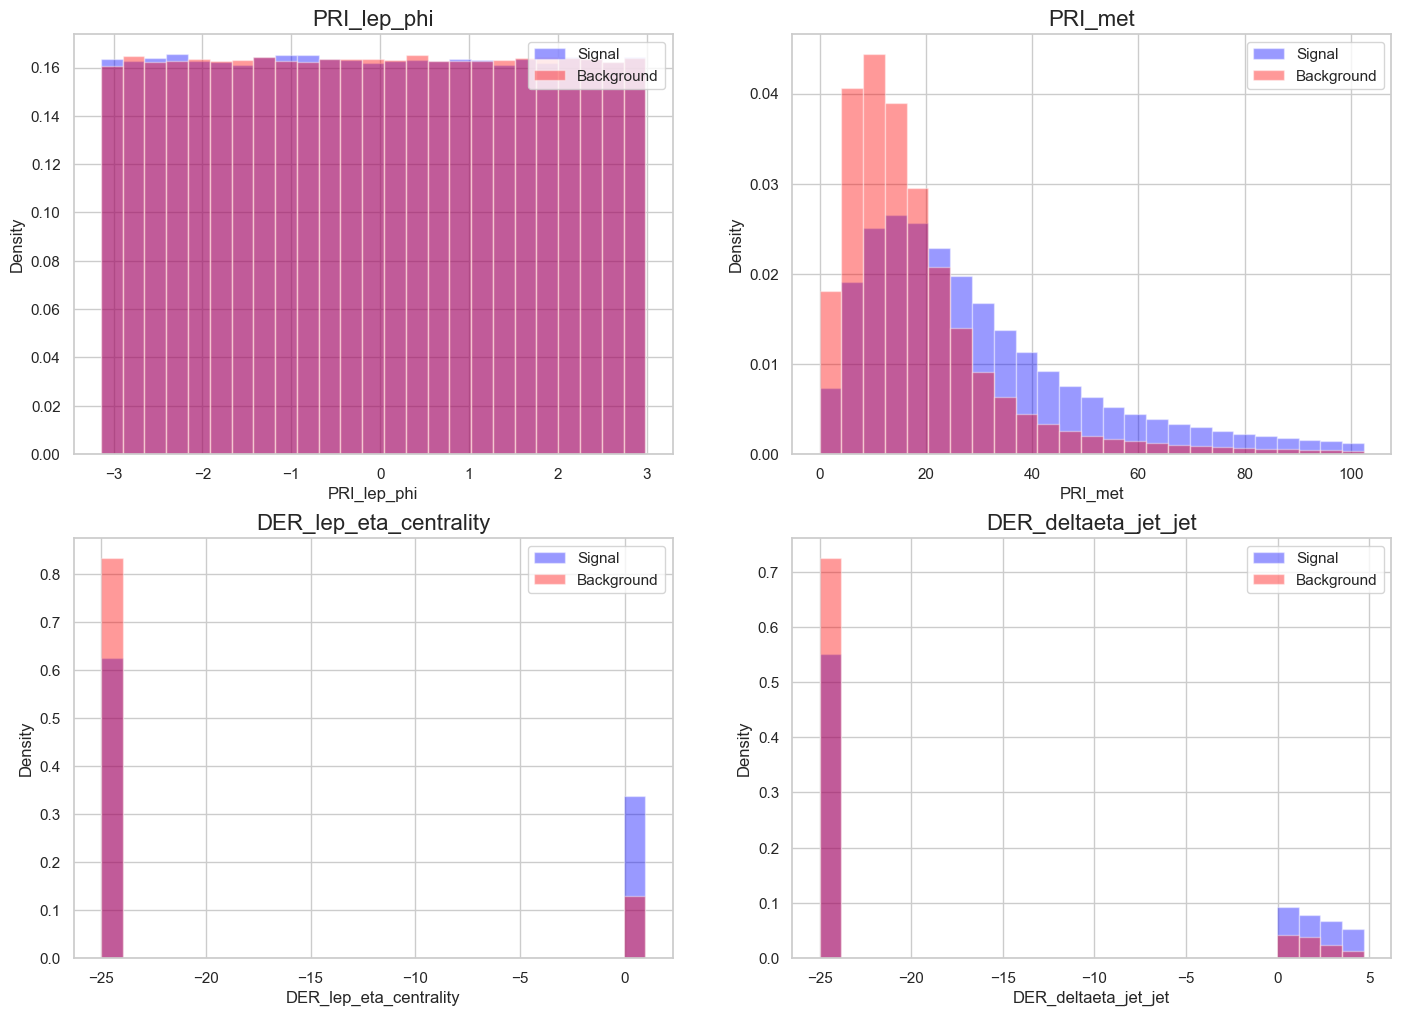

In [12]:
from  utils import histogram_dataset
# Show data summary
histogram_dataset(data_set, target, weights, columns=["PRI_lep_phi","PRI_met","DER_lep_eta_centrality","DER_deltaeta_jet_jet"])

Signal feature  correlation matrix


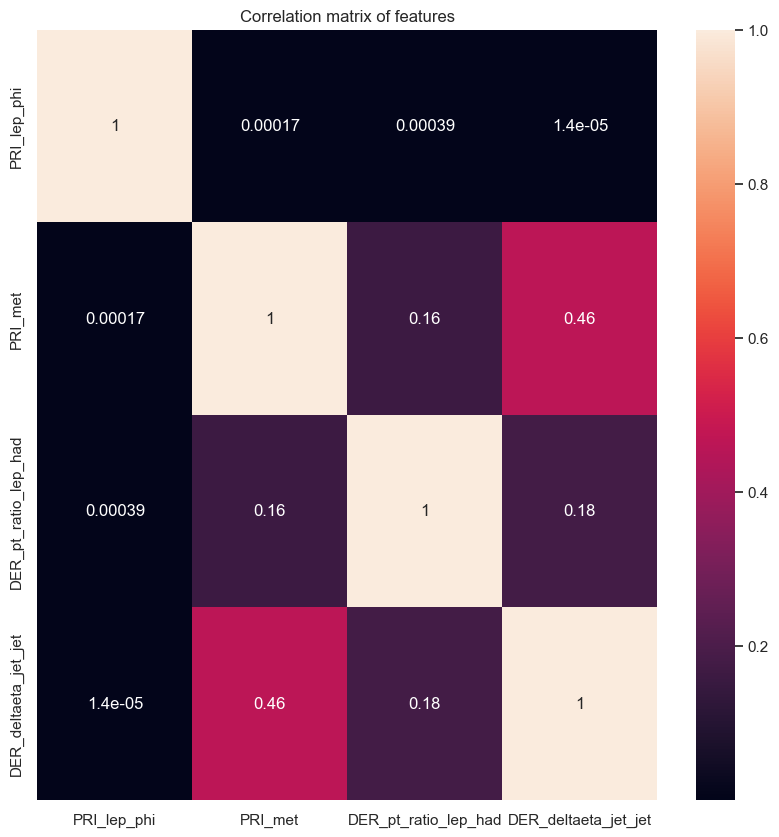

Background feature  correlation matrix


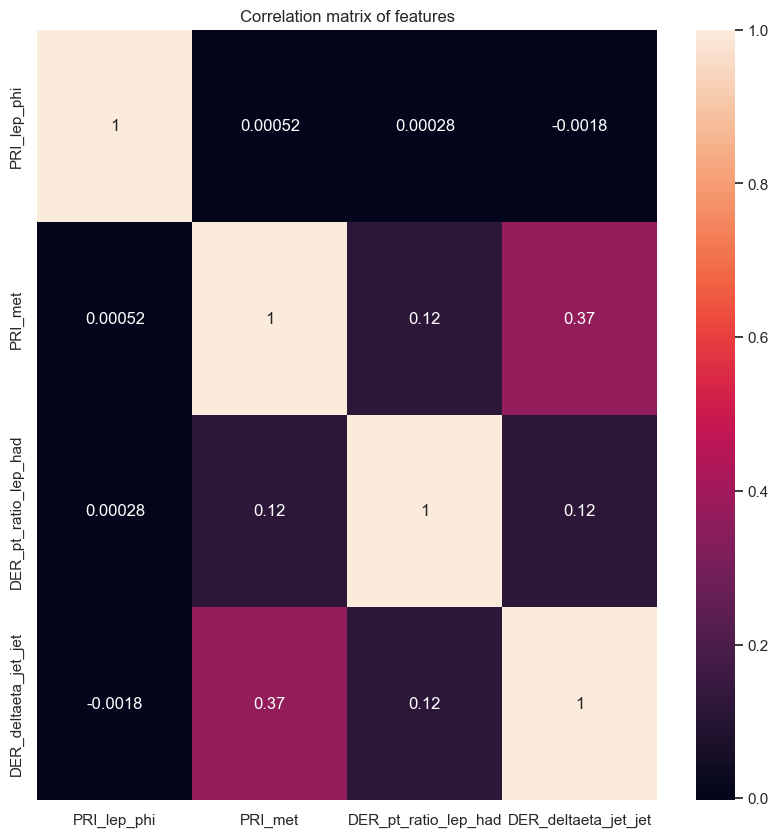

In [13]:
import seaborn as sns
sns.set_theme(rc={"figure.figsize": (10, 10)}, style="whitegrid")

caption = ["Signal feature", "Background feature"]

for i in range(2):

    dfplot = pd.DataFrame(data_set, columns=["PRI_lep_phi","PRI_met","DER_pt_ratio_lep_had","DER_deltaeta_jet_jet"])

    print(caption[i], " correlation matrix")
    corrMatrix = dfplot[target == i].corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title("Correlation matrix of features")
    plt.show()

del dfplot


keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


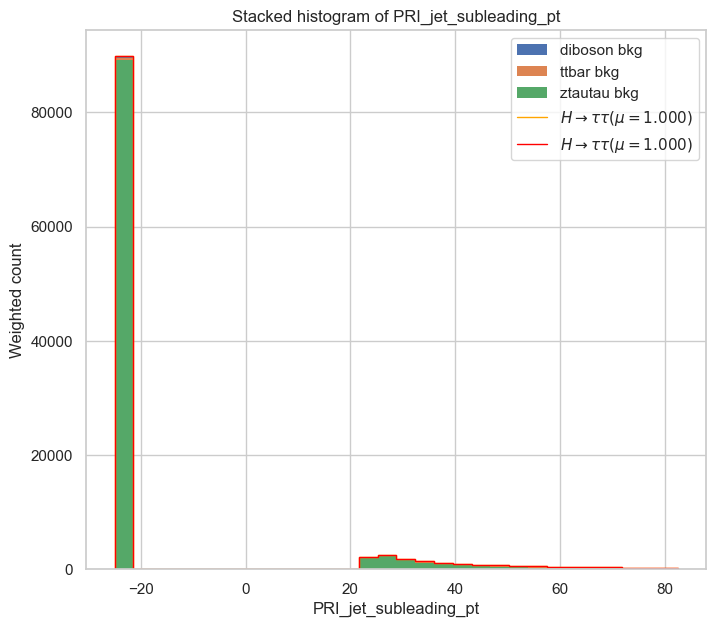

In [14]:
from HiggsML.visualization import stacked_histogram

stacked_histogram(data_set, target, weights, detailed_label,"PRI_jet_subleading_pt")

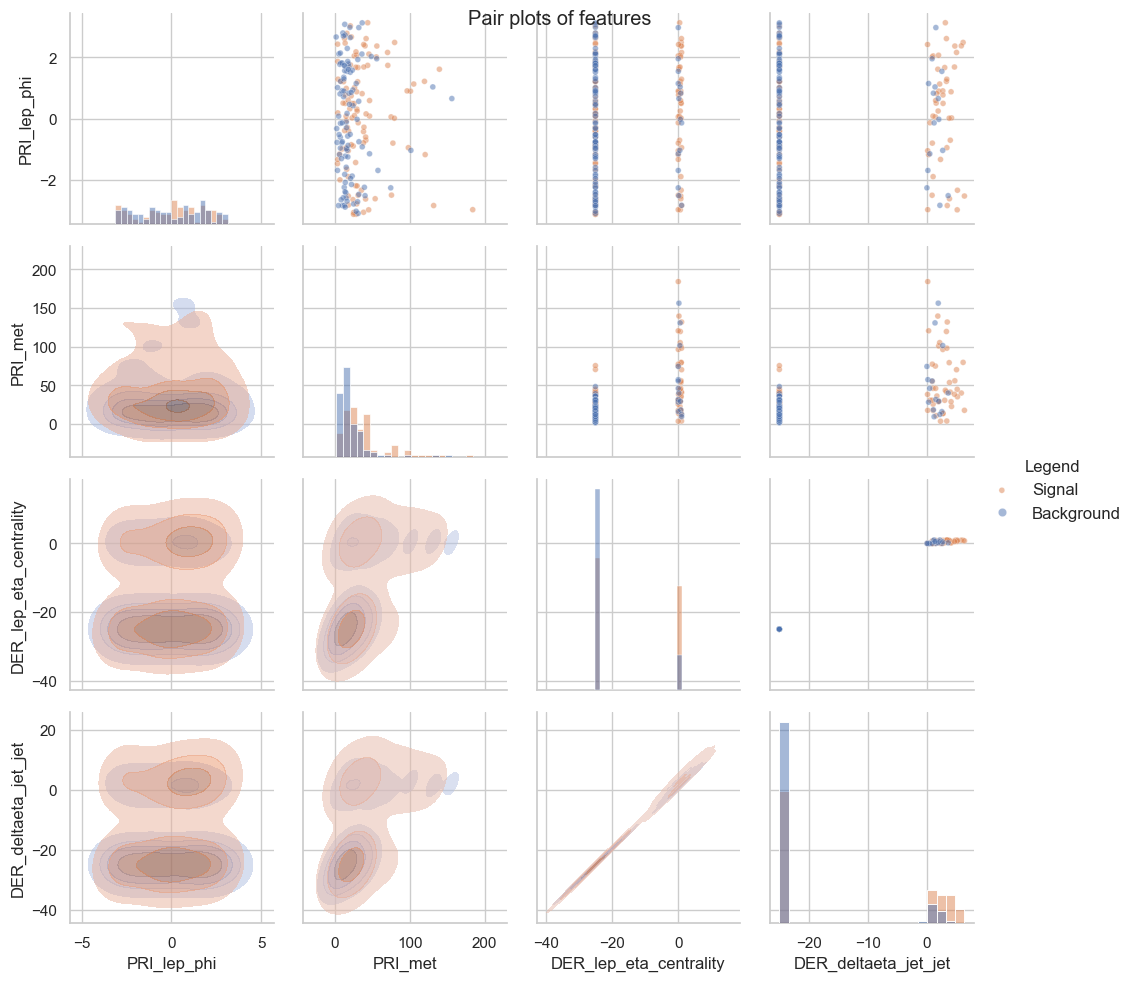

In [15]:
from HiggsML.visualization import pair_plots
# Show data summary
pair_plots(data_set, target, sample_size=100, columns=["PRI_lep_phi","PRI_met","DER_lep_eta_centrality","DER_deltaeta_jet_jet"])

### Test Settings
The Test setting sets the test conditions in ingestion.
This includes what systematics you want and how many psuedo experiments you want. 

In [16]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42

In [17]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)


### Ingestion



In [18]:

from HiggsML.ingestion import Ingestion

ingestion = Ingestion(data)


In [19]:

# initialize submission
ingestion.init_submission(Model)

2025-05-23 12:01:33,188 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-05-23 12:01:33,191 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-05-23 12:01:33,742 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-05-23 12:01:33,761 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  100.14492593549974
sum_bkg_weights:  105042.8550740645


2025-05-23 12:01:34,276 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-05-23 12:01:34,305 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  101.52424483912324
sum_bkg_weights:  105041.47575516091


2025-05-23 12:01:34,899 - HiggsML.datasets     - INFO     - Data loaded successfully



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  98.5205462647395
sum_bkg_weights:  105044.4794537353
 
 
Training Data:  (5000, 28)
 Model is Sample Model


2025-05-23 12:01:34,940 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


score shape before threshold (4573,)
score shape after threshold (4573,)
saved_info {'beta': np.float64(94472.9319027938), 'gamma': np.float64(93.2375053346079), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x00000220AB0593A0>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x00000220AB059580>}
Train Results: 
	 mu_hat  :  -0.6157659203611935
	 del_mu_stat  :  3.2982020228053086
	 del_mu_sys  :  0.0
	 del_mu_tot  :  3.2982020228053086
Holdout Results: 
	 mu_hat  :  0.9999999999999588
	 del_mu_stat  :  3.2982020228053086
	 del_mu_sys  :  0.0
	 del_mu_tot  :  3.2982020228053086
Valid Results: 
	 mu_hat  :  4.185971751247519
	 del_mu_stat  :  3.2982020228053086
	 del_mu_sys  :  0.0
	 del_mu_tot  :  3.2982020228053086
keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


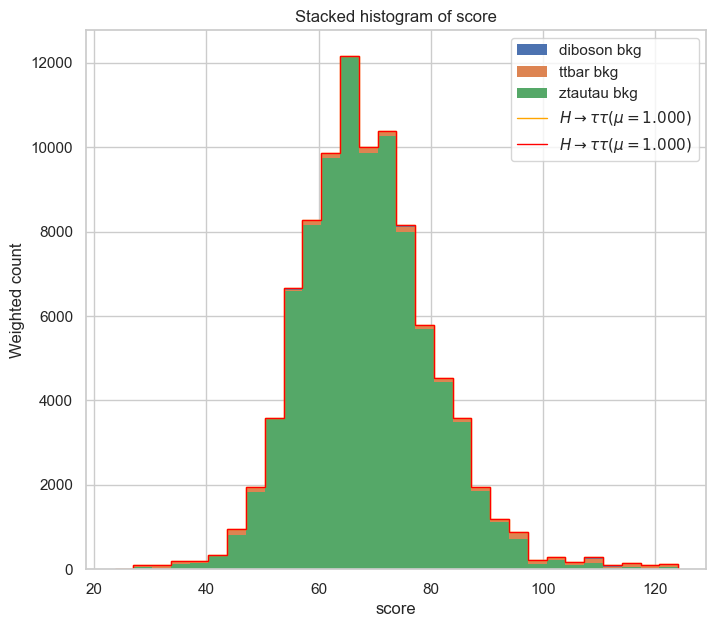

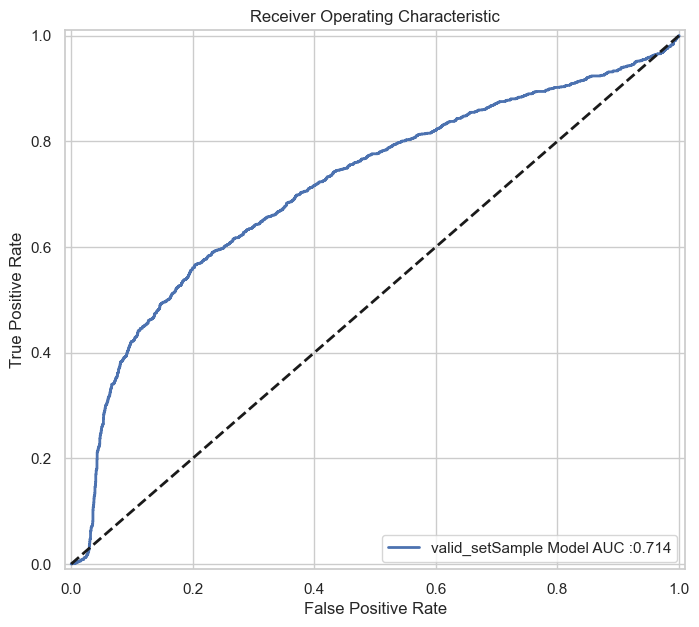

In [20]:

# fit submission
ingestion.fit_submission()

In [21]:

# load test set
data.load_test_set()

2025-05-23 12:01:36,852 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-05-23 12:01:37,272 - HiggsML.datasets     - INFO     - Test data loaded successfully


In [22]:

# predict submission
ingestion.predict_submission(test_settings)

2025-05-23 12:01:37,290 - HiggsML.ingestion    - INFO     - Calling predict method of submitted model with seed: 31415


sumof weights 95067.0
Test Results:  {'mu_hat': np.float64(6.371557186930549), 'del_mu_stat': np.float64(3.2982020228053086), 'del_mu_sys': np.float64(0.0), 'del_mu_tot': np.float64(3.2982020228053086)}
sumof weights 94869.0
Test Results:  {'mu_hat': np.float64(4.247948245556328), 'del_mu_stat': np.float64(3.2982020228053086), 'del_mu_sys': np.float64(0.0), 'del_mu_tot': np.float64(3.2982020228053086)}
sumof weights 95031.0
Test Results:  {'mu_hat': np.float64(5.985446470317054), 'del_mu_stat': np.float64(3.2982020228053086), 'del_mu_sys': np.float64(0.0), 'del_mu_tot': np.float64(3.2982020228053086)}
sumof weights 94840.0
Test Results:  {'mu_hat': np.float64(3.93691461272879), 'del_mu_stat': np.float64(3.2982020228053086), 'del_mu_sys': np.float64(0.0), 'del_mu_tot': np.float64(3.2982020228053086)}
sumof weights 94763.0
Test Results:  {'mu_hat': np.float64(3.11106669108326), 'del_mu_stat': np.float64(3.2982020228053086), 'del_mu_sys': np.float64(0.0), 'del_mu_tot': np.float64(3.298202

In [23]:
ingestion.process_results_dict()

In [24]:
# save result
ingestion.save_result(output_dir)

## Score
1. Compute Scores
2. Visualize Scores


In [25]:
from HiggsML.score import Scoring

In [26]:
# Initialize Score
score = Scoring()

In [27]:
print(output_dir)
score.load_ingestion_results(prediction_dir = output_dir, score_dir = output_dir)

d:\Work_Stuff\BlackSwan\Collaboration_A\sample_result_submission


2025-05-23 12:05:00,201 - HiggsML.score        - INFO     - Read ingestion results from d:\Work_Stuff\BlackSwan\Collaboration_A\sample_result_submission


2025-05-23 12:05:00,214 - HiggsML.score        - INFO     - Computing scores
c:\Users\Ragansu_User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mpld3\mplexporter\utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
c:\Users\Ragansu_User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mpld3\mplexporter\utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
c:\Users\Ragansu_User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mpld3\mplexporter\utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.1

[✔]


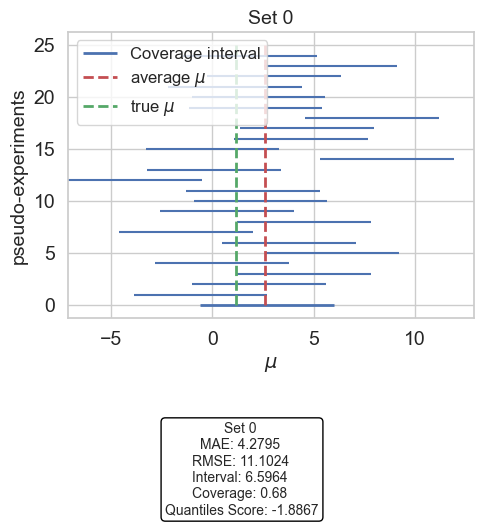

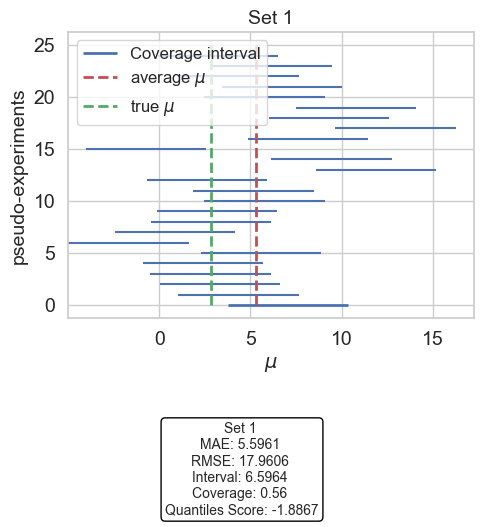

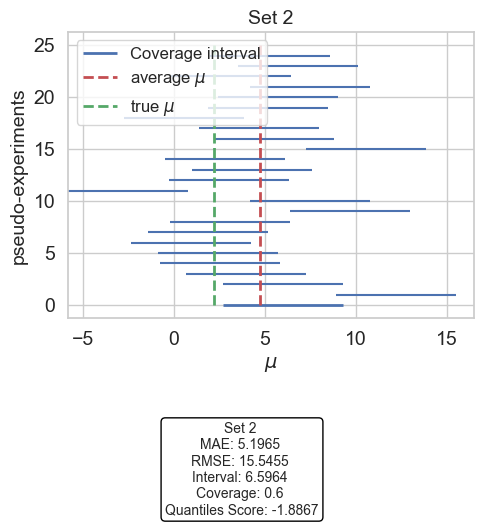

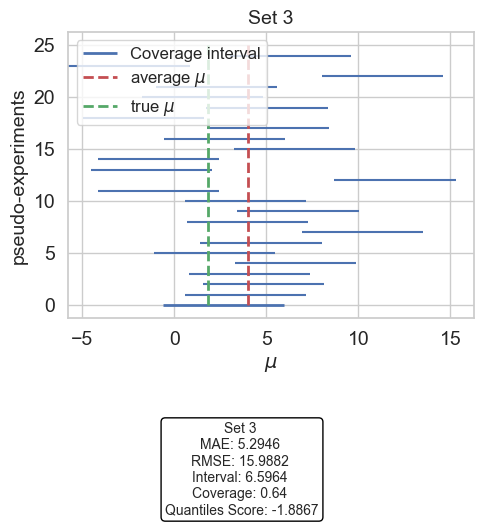

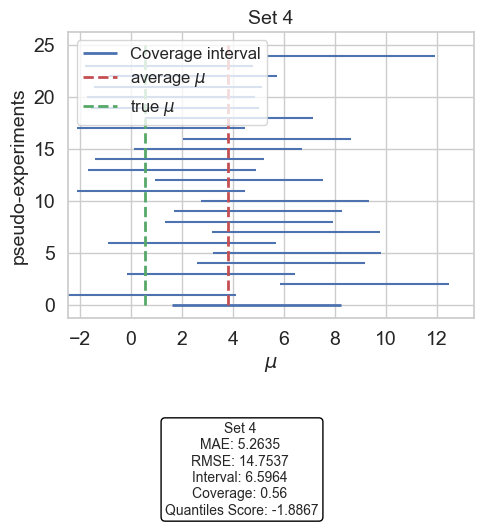

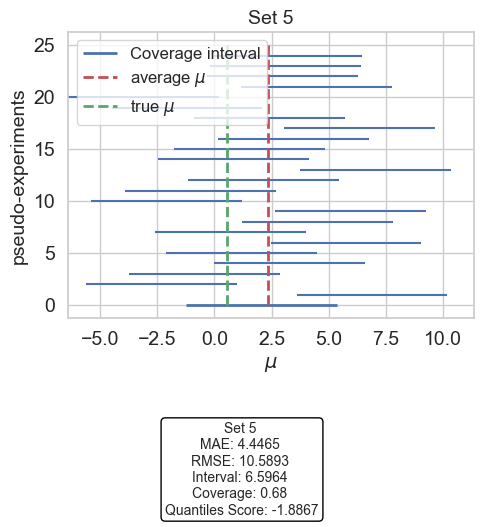

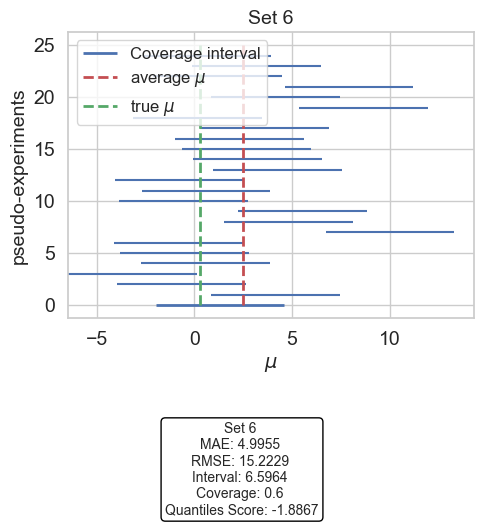

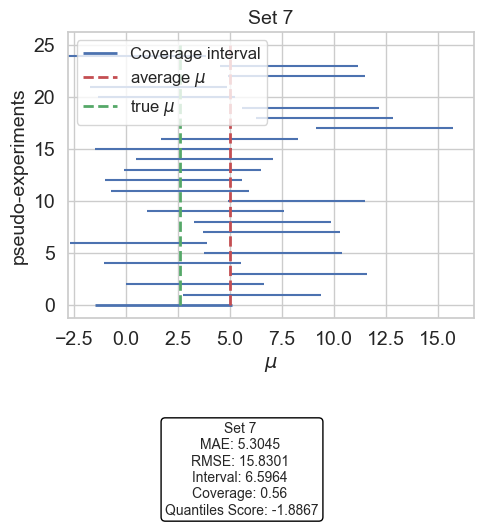

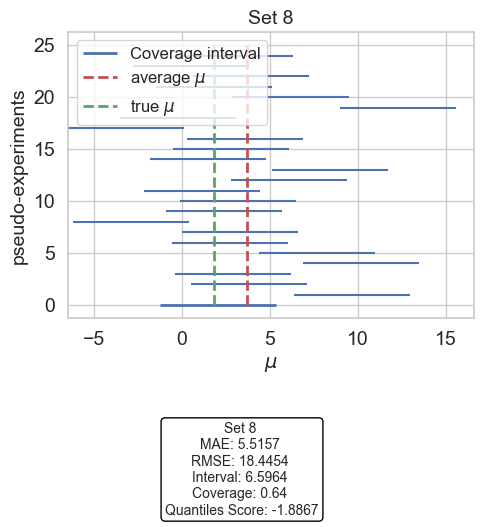

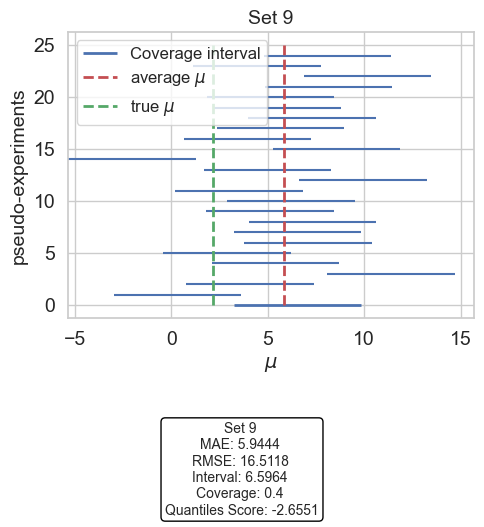

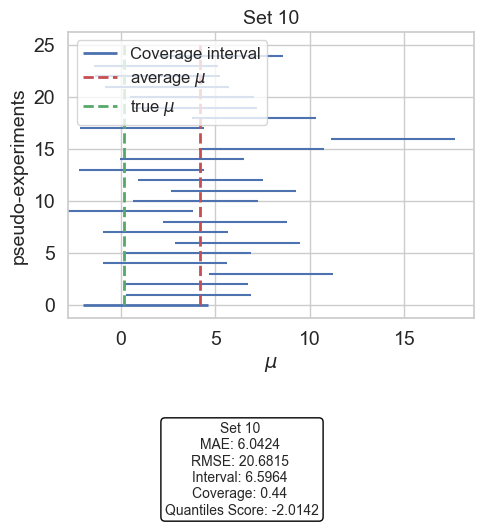

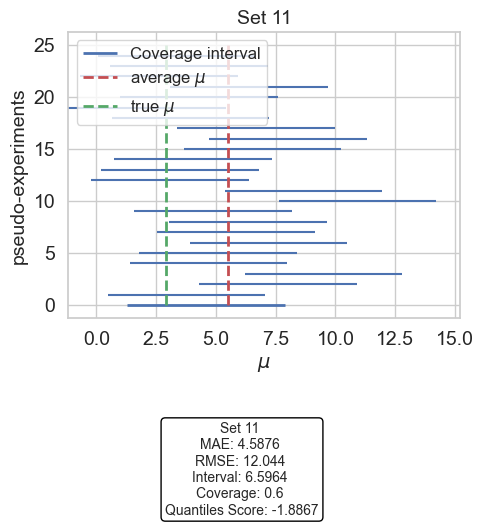

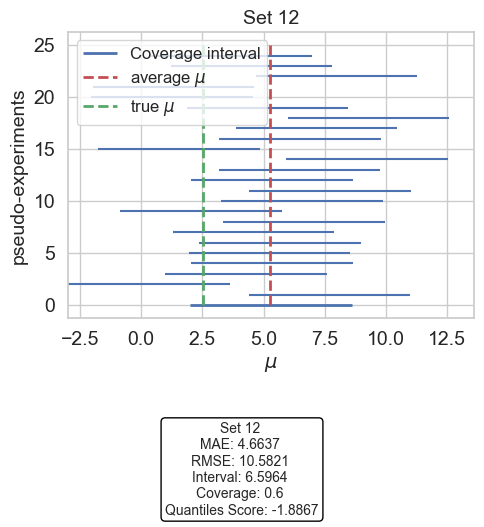

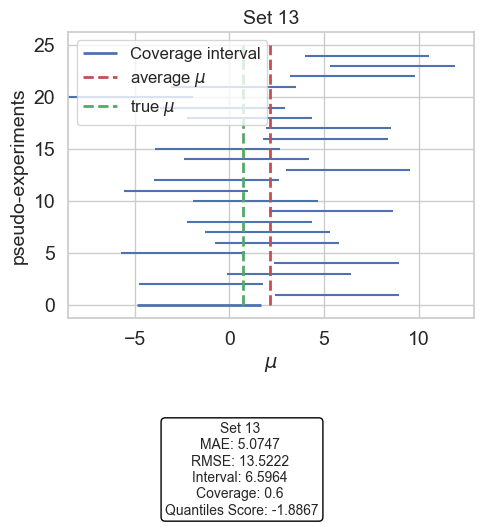

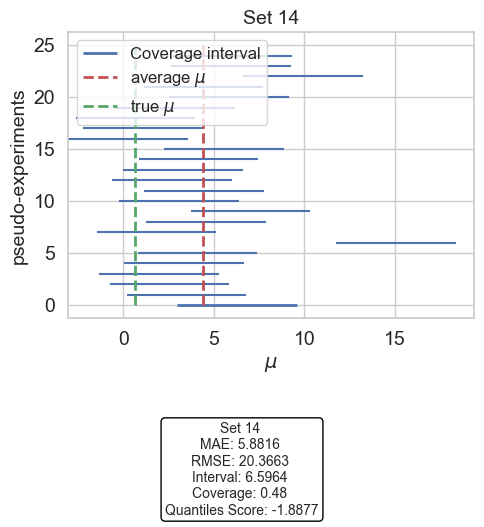

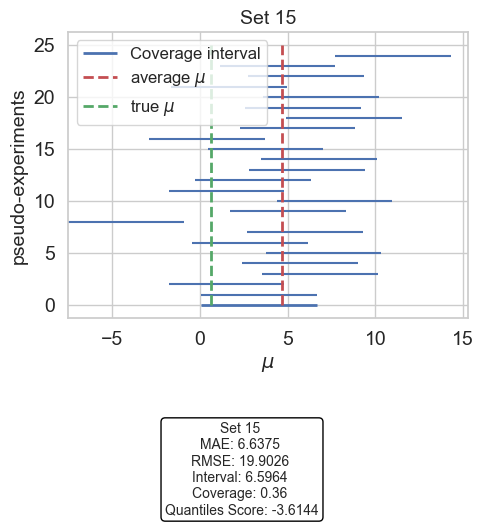

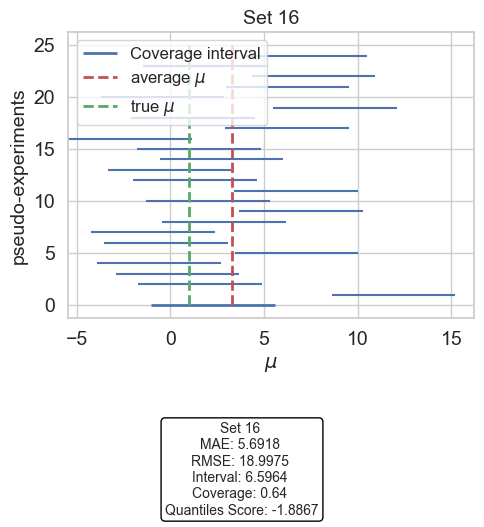

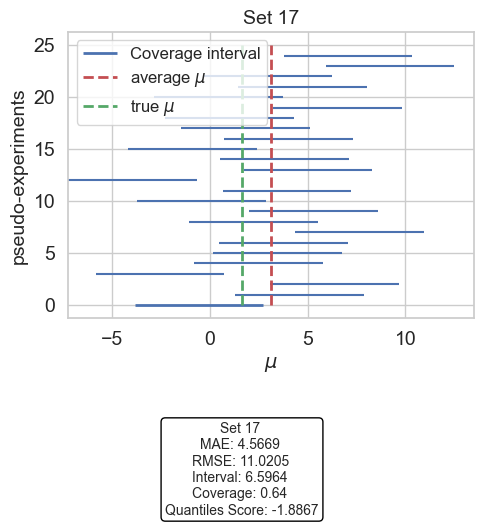

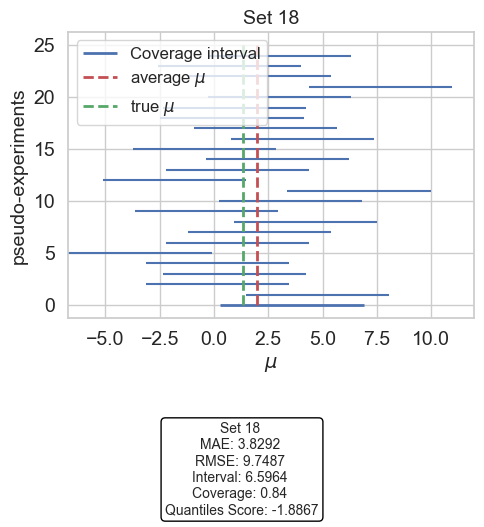

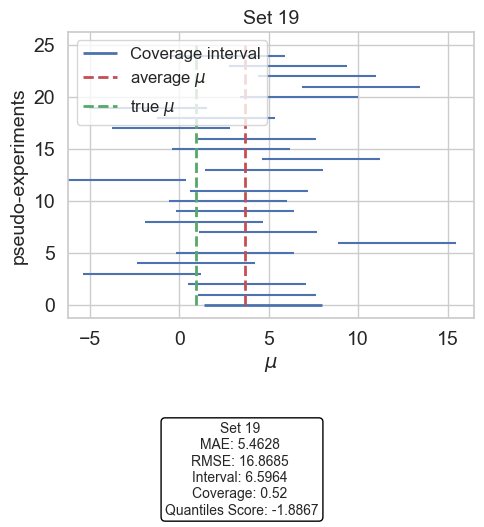

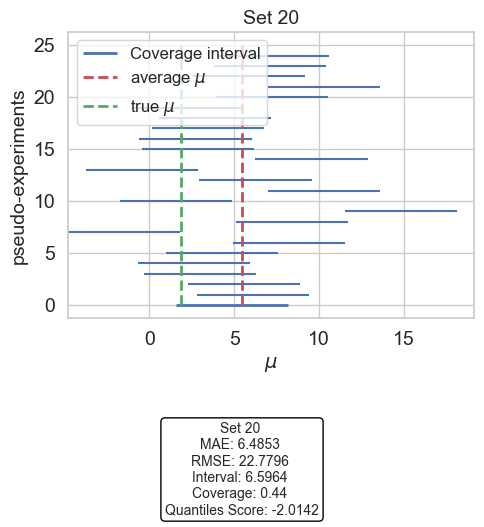

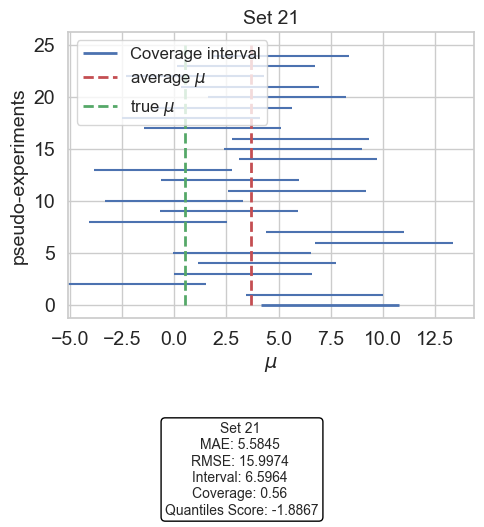

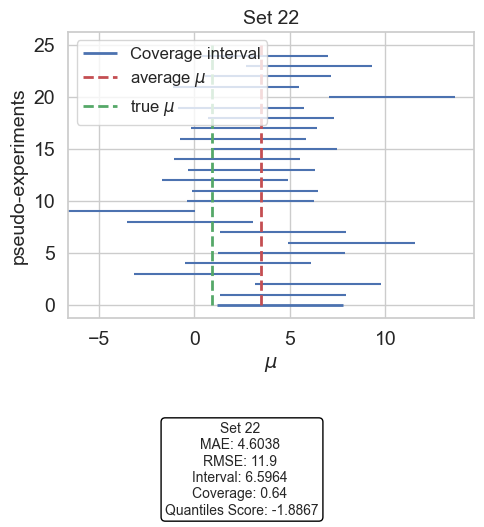

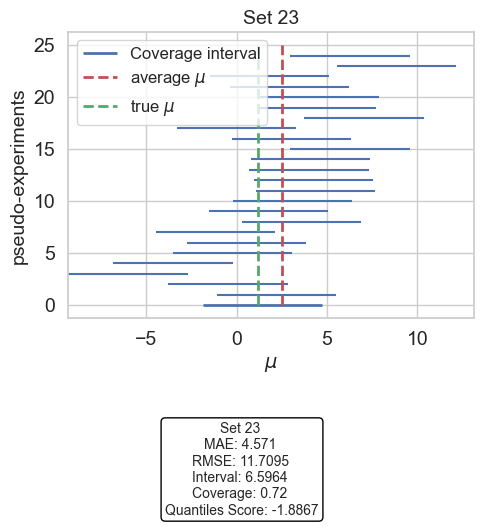

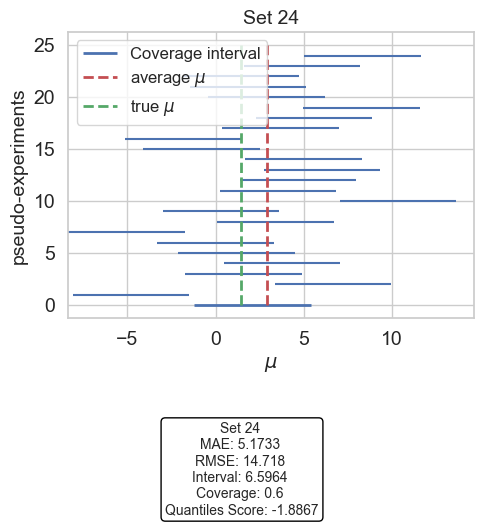

In [28]:
# Compute Score
score.compute_scores(test_settings)


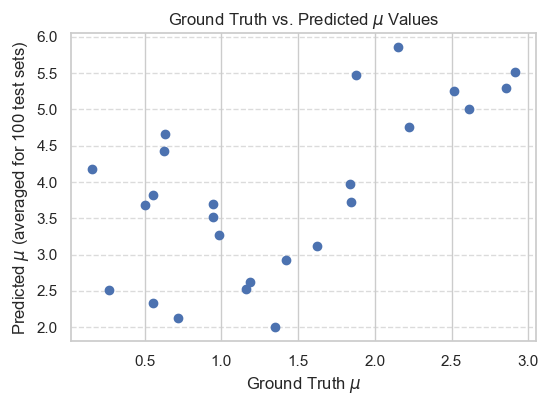

In [29]:
from HiggsML.visualization import  visualize_scatter

# Visualize scatter plot of ground truth mu and predicted mu
visualize_scatter(ingestion_result_dict=ingestion.results_dict, 
                  ground_truth_mus=test_settings["ground_truth_mus"])

In [30]:
!python -m HiggsML.score --prediction $output_dir --output $output_dir

############################################
### Scoring Program
############################################

d:\Work_Stuff\BlackSwan\Collaboration_A\sample_result_submission\test_settings.json
d:\Work_Stuff\BlackSwan\Collaboration_A\sample_result_submission
[✔]

----------------------------------------------
[✔] Scoring Program executed successfully!
----------------------------------------------




2025-05-23 12:05:14,718 - HiggsML.score        - INFO     - Reading ingestion duration from d:\Work_Stuff\BlackSwan\Collaboration_A\sample_result_submission\ingestion_duration.json
2025-05-23 12:05:14,718 - HiggsML.score        - WARNING  - File d:\Work_Stuff\BlackSwan\Collaboration_A\sample_result_submission\ingestion_duration.json not found. Setting ingestion duration to 0.
2025-05-23 12:05:14,726 - HiggsML.score        - INFO     - Read ingestion results from d:\Work_Stuff\BlackSwan\Collaboration_A\sample_result_submission
2025-05-23 12:05:14,727 - HiggsML.score        - INFO     - Computing scores
c:\Users\Ragansu_User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mpld3\mplexporter\utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
c:\Users\Ragansu_User\AppData\Local\P